# PHYS 2820
## Review: Lectures 14-19


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing(use_latex='mathjax') # pretty printing with LaTeX
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import tqdm
from ipywidgets import interactive, fixed

- - -


# Computer Algebra Systems
## Lecture 14

## Symbols

Just like the NumPy `ndarray` or the Pandas `DataFrame`, SymPy has `Symbol`, which represents a mathematical variable.

We create symbols using the function `symbols`.  Operations on these symbols don't do numeric work like with NumPy or Pandas, instead they build up mathematical expressions.

In [2]:
x, y, z = sp.symbols('x,y,z')
alpha, beta, gamma = sp.symbols('α,beta,gamma')

In [3]:
x + 1

x + 1

In [4]:
sp.log(alpha**beta) + gamma

       ⎛ β⎞
γ + log⎝α ⎠

In [5]:
sp.sin(x)**2 + sp.cos(x)**2

   2         2   
sin (x) + cos (x)

## Derivatives

One of the most commonly requested operations in SymPy is the derivative.  To take the derivative of an expression use the `diff` method

In [6]:
(x**2).diff(x)

2⋅x

In [7]:
sp.sin(x).diff(x)

cos(x)

In [8]:
(x**2 + x*y + y**2).diff(x)

2⋅x + y

In [9]:
sp.diff(x**2 + x*y + y**2, y) # diff is also available as a function

x + 2⋅y

## Expressions

SymPy has a number of useful routines to manipulate expressions.  The most commonly used function is `simplify`.

In [10]:
expr = sp.sin(x)**2 + sp.cos(x)**2
expr

   2         2   
sin (x) + cos (x)

In [11]:
sp.simplify(expr)

1

# Numeric Evaluation

In this section we'll learn how to use our symbolic equations to drive numeric computations

In [12]:
x, y, z = sp.symbols('x,y,z')
n, m = sp.symbols('n,m', integer=True)

## `.subs` and `.evalf`

The simplest (and slowest) ways to evaluate an expression numerically is with the `.subs` and `.evalf` methods 

In [13]:
sp.sin(x)

sin(x)

In [14]:
sp.sin(x).subs({x: 0})

0

In [15]:
sp.acos(x).subs({x: -1})

π

In [16]:
sp.acos(x).subs({x: -1}).evalf()

3.14159265358979

In [17]:
sp.acos(x).subs({x: -1}).evalf(n=100)

3.1415926535897932384626433832795028841971693993751058209749445923078164062862
08998628034825342117068

## `lambdify`

The `.subs` and `.evalf` methods are great for when you want to evaluate an expression at a single point.  When you want to evaluate your expression on lots of points they quickly become slow. 

To resolve this problem SymPy can rewrite its expressions as normal Python functions using the `math` library, vectorized computations using the NumPy library, C or Fortran Code using code printers, or even more sophisticated systems.

We'll talk about some of the more advanced topics later.  For now, `lambdify`...

In [18]:
myfunc = lambda x: 2*x

myfunc(3)

6

In [19]:
# function = lambdify(input, output)

f = sp.lambdify(x, x**2)
f(3)

9

In [20]:
f = sp.lambdify(x, x**2, 'numpy')  # Use numpy backend
data = np.array([1, 2, 3, 4, 5])
f(data)

array([ 1,  4,  9, 16, 25])

- - -

#### Representing a symbolic equality, like say: $$x^2 = y$$

In [21]:
eq = sp.Eq(x**2, y)

In [22]:
eq.lhs

 2
x 

In [23]:
eq.rhs

y

In [24]:
sp.solve(eq, x)

[-√y, √y]

## Substitution

We often want to substitute in one expression for another.  For this we use the subs method

In [25]:
x**2

 2
x 

In [26]:
# Replace x with y
(x**2).subs({x: y})

 2
y 

### Exercise

Subsitute $x$ for $sin(x)$ in the equation $x^2 + 2\cdot x + 1$

In [27]:
# Replace x with sin(x)

(x**2 + 2*x + 1).subs({ x : sp.sin(x)})

   2                  
sin (x) + 2⋅sin(x) + 1

## Subs + Solve

We can use subs and solve together to plug the solution of one equation into another

### Example
The radius of a sphere given its volume $ V = \frac{4}{3}\pi r^3$.

In [28]:
V, r = sp.symbols('V, r', real=True)

# as an equation this can writen as either
volume_eq = V - 4*sp.pi/3 * r**3
# or
volume_eq = sp.Eq(V, 4*sp.pi/3 * r**3)

In [29]:
soln = sp.solve([volume_eq], [r], dict=True)
soln

⎡⎧   3 ___ 3 ___⎫  ⎧     3 ___ 3 ___   3 ___  5/6   3 ___⎫  ⎧     3 ___ 3 ___ 
⎢⎪   ╲╱ 6 ⋅╲╱ V ⎪  ⎪     ╲╱ 6 ⋅╲╱ V    ╲╱ 2 ⋅3   ⋅ⅈ⋅╲╱ V ⎪  ⎪     ╲╱ 6 ⋅╲╱ V  
⎢⎨r: ───────────⎬, ⎨r: - ─────────── - ──────────────────⎬, ⎨r: - ─────────── 
⎢⎪       3 ___  ⎪  ⎪         3 ___            3 ___      ⎪  ⎪         3 ___   
⎣⎩     2⋅╲╱ π   ⎭  ⎩       4⋅╲╱ π           4⋅╲╱ π       ⎭  ⎩       4⋅╲╱ π    

  3 ___  5/6   3 ___⎫⎤
  ╲╱ 2 ⋅3   ⋅ⅈ⋅╲╱ V ⎪⎥
+ ──────────────────⎬⎥
         3 ___      ⎪⎥
       4⋅╲╱ π       ⎭⎦

We want the first of these three solutions

In [30]:
soln[0]

⎧   3 ___ 3 ___⎫
⎪   ╲╱ 6 ⋅╲╱ V ⎪
⎨r: ───────────⎬
⎪       3 ___  ⎪
⎩     2⋅╲╱ π   ⎭

Now lets compute the surface area of a sphere in terms of the volume.  Recall that the surface area of a sphere is given by

$$ 4 \pi r^2 $$

In [31]:
(4*sp.pi*r**2).subs(soln[0])

 2/3 3 ___  2/3
6   ⋅╲╱ π ⋅V   

Does the expression look right?  How would you expect the surface area to scale with respect to the volume?  What is the exponent on $V$?

- - -

# Solvers

## Differential Equations

A population that grows without bound is modeled by the differential equation

$$f'(t)=af(t)$$

Solve this differential equation using SymPy.

In [32]:
t, a = sp.symbols('t, a')
f = sp.symbols('f', cls=sp.Function)

In [33]:
sp.dsolve(f(t).diff(t) - a*f(t), f(t))

           a⋅t
f(t) = C₁⋅ℯ   

If the population growth is bounded, it is modeled by 

$$f'(t) = f(t)(1 - f(t))$$

Solve this differential equation using SymPy.

In [34]:
sp.dsolve(f(t).diff(t) - f(t)*(1 - f(t)), f(t))

           1     
f(t) = ──────────
           -t    
       C₁⋅ℯ   + 1

In Lecture 13, we considered the equation of motion

$$ma = -bv -mg$$

Now the code from that lecture should be more familar.

In [35]:
b, g, m, t = sp.symbols('b,g,m,t')
y = sp.symbols('y', cls=sp.Function)

eqn = sp.Eq(m*y(t).diff(t,2),  - b*y(t).diff(t) - m *g)
eqn

    2                           
   d              d             
m⋅───(y(t)) = - b⋅──(y(t)) - g⋅m
    2             dt            
  dt                            

In [36]:
sp.dsolve(eqn, y(t))

                -b⋅t         
                ─────        
                  m     g⋅m⋅t
y(t) = C₁ + C₂⋅ℯ      - ─────
                          b  

In [37]:
y0, v0 = sp.symbols('y0,v0')
ics = { y(t).subs(t, 0): y0, y(t).diff(t).subs(t, 0): v0} 
ics

⎧          ⎛d       ⎞│       ⎫
⎨y(0): y₀, ⎜──(y(t))⎟│   : v₀⎬
⎩          ⎝dt      ⎠│t=0    ⎭

In [38]:
sp.dsolve(eqn, ics=ics)

                                                  -b⋅t 
                                                  ─────
                              2                     m  
            g⋅m⋅t   m⋅v₀   g⋅m    m⋅(b⋅v₀ + g⋅m)⋅ℯ     
y(t) = y₀ - ───── + ──── + ──── - ─────────────────────
              b      b       2               2         
                            b               b          

- - -

# Building on Physics Past
## Lecture 15

## 4. Block on an inclined plane

A m = 1.5 kg block rests on a horizontal board hinged at one end.  The coefficient of static friction is μ=0.1.  The free end of the board is lifted very slowly.  At what angle will the block begin to slide down the board?

***Solution***

In [39]:
m, g, μ, θ = sp.symbols('m, g, μ, θ', positive=True)

The component of gravity acting along the board ($r=0$ is at the hinge, $r$ increases up the board):

In [40]:
Fg_radial = - m * g * sp.sin(θ)

The component of gravity acting prependicular to the board:

In [41]:
Fg_normal= - m * g * sp.cos(θ)

Normal force on the block from the board:

In [42]:
Fnormal = - Fg_normal

Maximum upword force (in direction of increasing r) provided by static friction:

In [43]:
Fstatic = μ * Fnormal

Find θ at which Fg_radial + Fstatic = 0

In [44]:
soln = sp.solve(Fg_radial+Fstatic, θ)[0] # pick out the first solution from a list of solutions
soln

      ⎛   ________    ⎞
      ⎜  ╱  2         ⎟
      ⎜╲╱  μ  + 1  - 1⎟
2⋅atan⎜───────────────⎟
      ⎝       μ       ⎠

SymPy seems to doing something interesting with a tangent half-angle formula, since we usually would write the solution as 

$$ \tan^{-1}(\mu) $$

but this is an equivalent solution.


Notice that the $m$ and $g$ have cancelled out, but we need to specify μ to get a number

In [45]:
critical_angle = soln.subs({μ: 0.1})
critical_angle.evalf(3)

0.0997

This is in radians; in degrees it would be

In [46]:
(critical_angle * 180/sp.pi).evalf(3)

5.71

So the block will begin to slide down the board at an angle of 5.71 degrees.

## 5. Block on an rotating inclined plane

A $m=1.5$ kg block rests on a horizontal board hinged at one end.  The block rests 0.3 m away from the hinge (hinge is at r=0).  The coefficient of static friction is μ=0.1.  The free end of the board is lifted so that angle between the board and the horizontal increases at a steady rate of $\omega$=0.4 rad/s.  At what angle will the block begin to slide down the board?

The twist here is that since the board is rotating with a non-negligible speed, the block feels a centrifugal force pushing it away from the hinge (up the board).  Thus, the angle at which it begins to slide should be larger.  The centrifugal force is 

$$F_c = m r ω^2.$$ 

(Alternatively, the force of static friction provides the centripetal acceleration required to keep the block moving in constant circular motion while it as rest with respect to the board.) 

Use $g$=9.81 m/s$^2$.

***Solution***

In [47]:
m, g, θ, μ, ω, r = sp.symbols('m, g, θ, μ, ω, r')

The component of gravity acting along the board ($r$=0 is at the hinge, $r$ increases up the board):

In [48]:
Fg_radial = -m * g * sp.sin(θ)

Centrifugal force:

In [49]:
Fc = m * r * ω**2

The component of gravity acting prependicular to the board:

In [50]:
Fg_normal = -m*g*sp.cos(θ)

Normal force:

In [51]:
Fnormal = -Fg_normal

Maximum upword force (in direction of increasing r) provided by static friction:

In [52]:
Fstatic = μ * Fnormal

Find θ at which Fgradial + Fstat + Fc = 0

In [53]:
Fg_radial+Fstatic+Fc

                                 2
g⋅m⋅μ⋅cos(θ) - g⋅m⋅sin(θ) + m⋅r⋅ω 

In [54]:
soln = sp.solve( Fg_radial + Fstatic + Fc, θ)
soln

⎡       ⎛       ____________________⎞         ⎛       ____________________⎞⎤
⎢       ⎜      ╱  2  2    2    2  4 ⎟         ⎜      ╱  2  2    2    2  4 ⎟⎥
⎢       ⎜g - ╲╱  g ⋅μ  + g  - r ⋅ω  ⎟         ⎜g + ╲╱  g ⋅μ  + g  - r ⋅ω  ⎟⎥
⎢-2⋅atan⎜───────────────────────────⎟, -2⋅atan⎜───────────────────────────⎟⎥
⎢       ⎜                  2        ⎟         ⎜                  2        ⎟⎥
⎣       ⎝         g⋅μ - r⋅ω         ⎠         ⎝         g⋅μ - r⋅ω         ⎠⎦

Picking out the physically meaningful root (a small positive angle) as the critical angle, $\theta_c$.

In [55]:
θc = soln[0]
θc

       ⎛       ____________________⎞
       ⎜      ╱  2  2    2    2  4 ⎟
       ⎜g - ╲╱  g ⋅μ  + g  - r ⋅ω  ⎟
-2⋅atan⎜───────────────────────────⎟
       ⎜                  2        ⎟
       ⎝         g⋅μ - r⋅ω         ⎠

We'll need to specify g, r, ω and μ to get a numerical result.

In [56]:
parameters = { μ:0.1, ω:0.4, r:0.3, g:9.8}

In [57]:
(θc.subs(parameters) * 180 / sp.pi).evalf(3)

5.99

So the block will begin to slide down the board at an angle of 5.99 degrees.

## 7. Collision on a track

Two carts are on a collision course on a frictionless track.  The first cart of mass $m_1$=1.1 kg is moving to the right with $v_1$=0.23 m/s while the second cart of mass $m_2$=0.87 kg is moving to the left at $v_2$=1.3 m/s.  Assuming the collision is elastic, find the velocities of the carts after the collision.

***Solution***

Conservation of momentum

$$ m_1 v_1 + m_2  v_2 = m_1 v_{1f} + m_2 v_{2f} $$

In [58]:
m1, m2, v1i, v1f, v2i, v2f = sp.symbols('m_1, m_2, v_1i, v_1f, v_2i, v_2f')

In Python the = means assignment and the == means equivalent; in SymPy to define a equation, we have to use the `Eq` function to denote equality of two expressions

In [59]:
eq_p = sp.Eq(m1 * v1i + m2 * v2i,  m1*v1f + m2*v2f)
eq_p

m₁⋅v₁ᵢ + m₂⋅v₂ᵢ = m₁⋅v_1f + m₂⋅v_2f

Conservation of energy

In [60]:
eq_e = sp.Eq( m1 * v1i**2/2 + m2 * v2i**2/ 2, m1 * v1f**2/2 + m2 * v2f**2/ 2 )
eq_e

      2         2          2          2
m₁⋅v₁ᵢ    m₂⋅v₂ᵢ    m₁⋅v_1f    m₂⋅v_2f 
─────── + ─────── = ──────── + ────────
   2         2         2          2    

In [61]:
soln =  sp.solve( [eq_p, eq_e], [v1f, v2f], dict=True ) 
soln

⎡                        ⎧                        m₂⋅(2⋅m₁⋅v₁ᵢ - m₁⋅v₂ᵢ + m₂⋅v
⎢                        ⎪      m₁⋅v₁ᵢ + m₂⋅v₂ᵢ - ────────────────────────────
⎢                        ⎨                                    m₁ + m₂         
⎢{v_1f: v₁ᵢ, v_2f: v₂ᵢ}, ⎪v_1f: ──────────────────────────────────────────────
⎣                        ⎩                              m₁                    

₂ᵢ)                                  ⎫⎤
───                                  ⎪⎥
           2⋅m₁⋅v₁ᵢ - m₁⋅v₂ᵢ + m₂⋅v₂ᵢ⎬⎥
───, v_2f: ──────────────────────────⎪⎥
                    m₁ + m₂          ⎭⎦

There are two solutions: the first the carts miss each other entirely. The second solution is the collision.

In [62]:
parameters = { m1:1.1, m2:0.87, v1i:0.23, v2i: -1.3} 
v1f_soln = soln[1][v1f].subs(parameters)
v2f_soln = soln[1][v2f].subs(parameters)

In [63]:
print(f'v_1f = {v1f_soln.evalf(2)}')

v_1f = -1.1


The first cart ends up moving to the left at -1.1 m/s.

In [64]:
print(f'v_2f = {v2f_soln.evalf(2)}')

v_2f = 0.41


The second cart ends up moving to the right at 0.41 m/s.

## 8. Simulating the 1D collision

Suppose the colliding carts in example 7  are equipped with magnets so arranged that the carts feel a repulsive force of magnitude $0.1/d^4$ in newtons, where $d$ is the distance between the carts in metres.  

Let's say the carts start 5 m apart (initially $x_1$=0 and $x_2$=5 metres).  Everything else is as given in example 7.  Use `odeint` from SciPy  to solve Newton's equation and then plot $x_1(t)$, $x_2(t)$, $v_1(t)$ and $v_2(t)$.  Long after the collision, do the final velocities match those given by the answer to example 7?

***Solution***

In [65]:
m1, m2, t, v1i, x1i, v2i, x2i = sp.symbols('m1, m2, t, v1i, x1i, v2i, x2i')
x1, x2 = sp.symbols('x1, x2', cls=sp.Function)

Force on cart1 depends on x1 and x2, and it always points to the left (negative)

In [66]:
F1 = - 0.1 / (x1(t) - x2(t) )**4
F1

     -0.1       
────────────────
               4
(x₁(t) - x₂(t)) 

Equation of motion for cart 1

In [67]:
eq1 = sp.Eq(m1 * x1(t).diff(t, t), F1)
eq1

     2                          
    d                -0.1       
m₁⋅───(x₁(t)) = ────────────────
     2                         4
   dt           (x₁(t) - x₂(t)) 

Information for cart1

In [68]:
cart1 = { m1:1.1, v1i:0.23, x1i:0}

Equation of motion for cart2

Force on cart2 depends on x1 and x2, and it always points to the right (positive).  It's also equal and opposite the force on cart1.

In [69]:
F2 = -F1

In [70]:
eq2 = sp.Eq( m2 * x2(t).diff(t, t), F2)
eq2

     2                          
    d                 0.1       
m₂⋅───(x₂(t)) = ────────────────
     2                         4
   dt           (x₁(t) - x₂(t)) 

Information for cart2

In [71]:
cart2 = { m2:0.87, v2i:-1.3, x2i:5}

Solving Newton's equation

SymPy can't do this analytically.  Let's try a numerical solver. In this example, we choose a solver from the SciPy package called `odeint`.

In [73]:
# define initial values
m1 = 1.1;  v1i = 0.23; x1i = 0
m2 = 0.87; v2i = -1.3; x2i = 5

# initial state vector
s0 = [x1i, v1i, x2i, v2i]

def RHS(s, t):
    x1, v1, x2, v2 = s
    return [v1,
            -0.1 / (x1 - x2)**4 / m1,
            v2,
            +0.1 / (x1 - x2)**4 / m2]

tf = 10
t = np.arange(0, tf, 0.1)

from scipy.integrate import odeint
soln = odeint(RHS, s0, t)
x1, v1, x2, v2 = soln.T

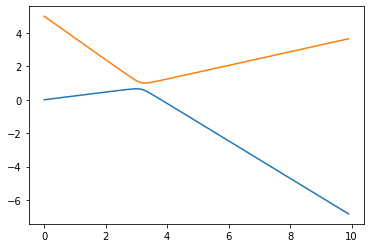

In [74]:
plt.plot(t, x1)
plt.plot(t, x2)

Looks like they "collide" at around 3 s.  Let's plot the velocities.

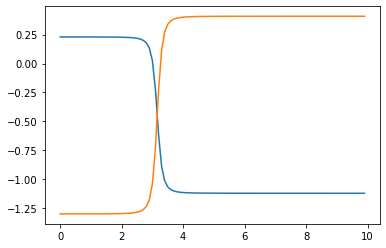

In [75]:
plt.plot(t, v1)
plt.plot(t, v2)

What are the "final" velocities?

In [76]:
print(v1[-1], v2[-1])

-1.1215112013489026 0.40880726607332357


These compare well with -1.1 and 0.41 found in the previous problem.

In [77]:
rel_err1 = abs( (v1[-1] - v1f_soln)/ v1f_soln) * 100
    
rel_err2 = abs( (v2[-1] - v2f_soln) / v2f_soln) * 100

print (rel_err1, rel_err2)

0.0125420604471676 0.0435172875089839


with only small percentage differences.

## 10. Falling rope

A long coiled rope rests at the edge of a platform.  One free end is gently placed 10 cm below the edge of the platform and released.  The rope begins to fall, unwinding as it goes over the edge.  The rope has uniform mass per unit length of $r= 2$ kg/m, and $g$ = 9.8 m/s$^2$.  If the height of the platform is $H=4$ m, find how long it takes for the end of the rope to reach the ground.  Ignore friction.

***Solution***

Here we must use the more general form of Newton's 2nd Law

$$ F = \frac {dp} {dt} = m(t)  y''(t) + m'(t) y'(t) $$

In [78]:
t, r, g, H = sp.symbols('t, r, g, H')
m, y, v = sp.symbols('m, y, v', cls=sp.Function)

In [79]:
dpdt = m(t) * y(t).diff(t, t) + m(t).diff(t) * y(t).diff(t)
dpdt

       2                          
      d          d        d       
m(t)⋅───(y(t)) + ──(m(t))⋅──(y(t))
       2         dt       dt      
     dt                           

Newton's 2nd Law

In [80]:
eqN = sp.Eq(dpdt, -m(t)*g)
eqN

       2                                    
      d          d        d                 
m(t)⋅───(y(t)) + ──(m(t))⋅──(y(t)) = -g⋅m(t)
       2         dt       dt                
     dt                                     

If the rope's end is at $y=y(t)$, then the length of rope dangling over the edge is $H-y(t)$, and the mass of the rope is

In [81]:
eq = eqN.subs( m(t), r*(H - y(t)))
eq

               2                                                    
              d          ∂                d                         
r⋅(H - y(t))⋅───(y(t)) + ──(r⋅(H - y(t)))⋅──(y(t)) = -g⋅r⋅(H - y(t))
               2         ∂t               dt                        
             dt                                                     

SymPy has done the substitution but not evaluated the derivatives.

In [82]:
eq2 = eq.doit()
eq2

               2                     2                  
              d            ⎛d       ⎞                   
r⋅(H - y(t))⋅───(y(t)) - r⋅⎜──(y(t))⎟  = -g⋅r⋅(H - y(t))
               2           ⎝dt      ⎠                   
             dt                                         

Again, SymPy does not know now to solve this symbolically. But it can help us set up the problem to solve numerically.

In [85]:
# replace derivative of y(t) with v(t)
eq3 = eq2.subs( y(t).diff(t), v(t))
sp.expand(eq3)

    d             2             d                           
H⋅r⋅──(v(t)) - r⋅v (t) - r⋅y(t)⋅──(v(t)) = -H⋅g⋅r + g⋅r⋅y(t)
    dt                          dt                          

In [86]:
soln = sp.solve(eq3, v(t).diff(t) )
soln

⎡                 2   ⎤
⎢-H⋅g + g⋅y(t) + v (t)⎥
⎢─────────────────────⎥
⎣       H - y(t)      ⎦

We have worked out the derivative of $v(t)$. Let's turn that into a function

In [87]:
F = sp.lambdify([y(t), v(t), H, g], soln[0])

This function, `F(y, v; H, g)`, evaluates the first derivative of $v(t)$. Knowing only the values of $y, v, H,$ and $g$ (but not $t$), we can now compute $dv/dt$.

In [88]:
F(1, 0, 4, 9.81)

-9.81

We can now write the system of equations

$$\begin{align}
\frac{dy}{dt} &= v \\
\frac{dv}{dt} &= F(y, v; H, g)
\end{align}$$

We can numerically solve this system of first order differential equations:

In [89]:
# define initial values
r = 2
H = 4 # m
g = 9.8
yi = H - 0.1 # m
vi = 0.0 # m/s

# Solve the system of ODEs
s0 = [yi, vi]

def RHS(s, t):
    y, v = s
    return [v,
            F(y, v, H, g)]

tf = 2
t = np.arange(0, tf, 0.1)

soln = odeint(RHS, s0, t)
y, v = soln.T

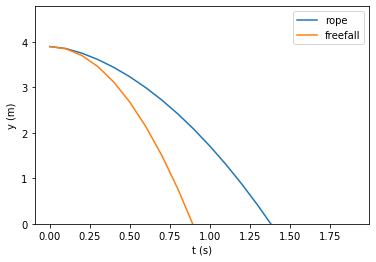

In [90]:
plt.plot(t, y, label='rope')
plt.plot(t, yi - 0.5*g*t**2, label='freefall')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(ymin = 0)
plt.legend()

Also plotted in the graph is the height of an object falling freely initially alongside the rope end.  The rope falls more slowly.

## Lecture 16
# Travel Time for Seismic Waves


$\cdots$

## Lecture 17
# Travel Time Curves and Earthquake Detection

$\cdots$

# Planetary Motion
## Lecture 18

**Newton's university law graviation**

$$ F = - \frac{G M m} {r^2}\hat{r} = -\frac{GMm}{r^3}\vec{r},$$ 

where $\vec{r}$ is the vector directed from $M$ to $m$.

- negative sign indicate gravity is attractive
- force decreases with separation distance $r$

**Gravitational constant $G$**

$$ G = 6.67 \times 10^{-11}\;\frac{\mbox{m}^3}{\mbox{kg}\cdot\mbox{s}^2} $$

#### Properties of gravitational force

- Magnitude depends only on separation of particles; direction along line joining particles: *central force*
  - orbit of the Earth restricted to a plane ($x-y$)
  - angular momentum $L$ is conserved and lies in the third ($z$) direction
  $$ L_z = ( r \times mv )_z = m (x v_y - y v_x) $$
- Total energy $E$ is conserved
  $$ E = \frac{1}{2} m v^2 - \frac{G M m}{r} $$

## Simulation of the Orbit

To solve this system, we rewrite each of these second order differential equations as two
first-order differential equations.

\begin{align}
\frac{d v_x}{dt} &= - \frac{G M}{r^3} x \\
\frac{d x}{dt} &= v_x \\
\frac{d v_y}{dt} &= - \frac{G M}{r^3} y \\
\frac{d y}{dt} &= v_y 
\end{align}

We can then solve these equations numerically.

In [91]:
def RK4Stepper( F = lambda s, t, p: s,  
                s0 = [],
                t0 = 0,
                p = [],
                dt = 0.1, 
                tmax = 1,
                ):
    """ 
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary r (current state and time)
    """

    s = np.array(s0)
    t = t0

    while t < tmax:
        r = list(s)
        r.append(t)
        yield r
              
        ds1 = F(s, t, p)
        s1 = s + ds1*dt/2
        ds2 = F(s1, t + dt/2, p)
        s2 = s + ds2*dt/2
        ds3 = F(s2, t + dt/2, p)
        s3 = s + ds3*dt
        ds4 = F(s3, t + dt, p)
        s = s + (ds1 + 2*ds2 + 2*ds3 + ds4)/6*dt
        
        t = t + dt

In [92]:
def Fplanet(s, t, p):
    x, y, vx, vy = s
    
    GM, = p
    
    r = np.sqrt(x**2 + y**2)
    dsdt = [vx,
            vy,
            - GM/r**3 * x,
            - GM/r**3 * y,
            ]
    return np.array(dsdt)

In [93]:
def PlanetPlot(data):

    plt.plot(data.x, data.y, ':', linewidth=2)

    # Plot the Sun at the origin
    plt.plot(0, 0, '.',color="yellow", markersize=40, markeredgecolor='black')
    # Plot the Earth at the final position
    plt.plot(data.x.iloc[-1], data.y.iloc[-1], '.', color= 'k', markersize=15)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    

- - -

## Simulation of the Orbit (in Astronomical Units)

In [94]:
def PlanetApp(x0=1, # AU
              y0 = 0,
              vx0 = 0,
              vy0 = 2*np.pi, # AU/yr
              tmax = 1, # one year
              dt = 0.001
              ):
        
    s0 = [x0, y0, vx0, vy0]
    
    ## GM in units of (AU)^3/(yr)^2
    GM = 4*np.pi**2 
    p = [GM] 
    
    stepper = RK4Stepper(Fplanet, s0=s0, p=p,
                              tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'vx', 'vy','t'])
    return data

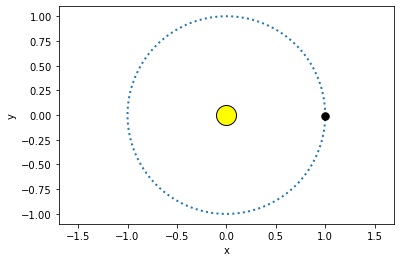

In [95]:
data = PlanetApp()
PlanetPlot(data)

# Three Body Problem
## Lecture 19

## A Mini-Solar System

These initial examples for planetary orbits have been restricted to two-body central forces.  Of course the Solar System is not a two-body system: the planets exert gravitational forces on each other.


Since there are other forces involved, the total force on a particular planet is no longer a central force. 

Strictly speaking, the orbits of the planets are not even all in the same plane but we will, for simplicity, assume only a two-dimensional solar system.

### Equations of Motion

$$\begin{align}
m_1 \frac{d^2 r_1}{dt^2} &= - \frac{GMm_1}{r_1^3}\vec{r_1} + \frac{Gm_1m_2}{r_{21}^3}\vec{r_{21}} \\
m_2 \frac{d^2 r_2}{dt^2} &= - \frac{GMm_2}{r_2^3}\vec{r_2} - \frac{Gm_1m_2}{r_{21}^3}\vec{r_{21}} \\
\end{align}
$$

where $\vec{r_1}$ and $\vec{r_2}$ are direction from the Sun to planets 1 and 2, respectively,  while $\vec{r_{21}} = \vec{r_2} - \vec{r_1}$ is the vector from planet 1 to planet 2.

We can divide the first equation by $m_1$ and the second equation by $m_2$ to get

$$\begin{align}
\frac{d^2 r_1}{dt^2} &= - \frac{GM}{r_1^3}\vec{r_1} + \frac{Gm_2}{r_{21}^3}\vec{r_{21}} \\
\frac{d^2 r_2}{dt^2} &= - \frac{GM}{r_2^3}\vec{r_2} - \frac{Gm_1}{r_{21}^3}\vec{r_{21}} \\
\end{align}
$$

To solve this system numerically, we need to write it as a system of first order differential equations for our variables:

$x_1, y_1, v_{x1}, v_{y1}, x_2, y_2, v_{x2}, v_{y2}$

The vectors $\vec{r_1}, \vec{r_2}, $ and $\vec{r_{21}}$ can be all written in terms of those variables.

Finally, $GM, m_1,$ and $m_2$ will be given as parameters. 



In [96]:
def FTwoPlanets(s, t, p):
    
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = s
    
    GM, m1, m2 = p
    
    r1 = np.sqrt(x1**2 + y1**2)
    r2 = np.sqrt(x2**2 + y2**2)
    
    dx = (x2 - x1)
    dy = (y2 - y1)
    dr = np.sqrt(dx**2 + dy**2)
    
    dsdt = [vx1,
            vy1,
            - GM/r1**3 * x1 + GM*m2/dr**3 * dx,
            - GM/r1**3 * y1 + GM*m2/dr**3 * dy,
            vx2,
            vy2,
            - GM/r2**3 * x2 - GM*m1/dr**3 * dx,
            - GM/r2**3 * y2 - GM*m1/dr**3 * dy,
            ]
        
    return np.array(dsdt)

In [97]:
def TwoPlanetPlot(data, tmax=None):
       
    # plot data on up to tmax (if provided)
    if tmax is not None:
        data = data[data.t <= tmax]
    
    plt.plot(data.x1, data.y1, '-', linewidth=0.5)
    plt.plot(data.x2, data.y2, '-', linewidth=0.5)

    # Plot the Sun at the origin
    plt.plot(0, 0, '.',color="yellow", markersize=20, markeredgecolor='black')
    
    # Plot the planet at the final position
    plt.plot(data.x1.iloc[-1], data.y1.iloc[-1], '.', color= 'k', markersize=15)
    plt.plot(data.x2.iloc[-1], data.y2.iloc[-1], '.', color= 'k', markersize=15)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')


In [98]:
def TwoPlanetApp(x10 = 1, # AU
                 y10 = 0,
                 vx10 = 0,
                 vy10 = np.sqrt(4*np.pi**2/1), # AU/yr
                 m1 = 0.001, # in solar mass units
                 x20 = 2, # AU
                 y20 = 0,
                 vx20 = 0,
                 vy20 = np.sqrt(4*np.pi**2/2), # AU/yr
                 m2 = 0.04,
                 tmax = 8,
                 dt = 0.01
                ):
        
    s0 =[x10, y10, vx10, vy10, x20, y20, vx20, vy20]
    
    ## GM in units of (AU)^3/(yr)^2
    GM = 4*np.pi**2 
    p = [GM, m1, m2] 
    
    stepper = RK4Stepper(FTwoPlanets, s0=s0, dt=dt, tmax=tmax, p=p)
    data = pd.DataFrame(stepper, columns = ['x1', 'y1', 'vx1', 'vy1', 
                                            'x2', 'y2', 'vx2', 'vy2',
                                            't'])    
    
    return data

The plotting function requires no other changes.

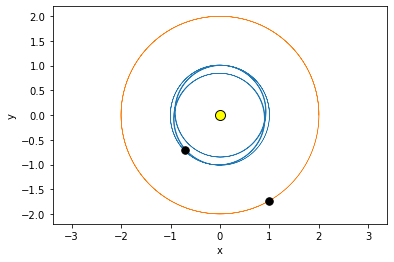

In [99]:
data = TwoPlanetApp()

TwoPlanetPlot(data)

It appears that the orbit of the inner planet is being perturbed by the more massive (40 times as massive) outer planet.